In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')
# , na_values=[0]

## Reading and Analysing the Data

In [354]:
data = pd.read_csv('C:/Users/Abhishek/Downloads/LabourTrainingEvaluationData.csv')

In [355]:
data.head(10)

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869
5,22,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16365.760,18449.270,25564.670
6,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16804.630,16354.600,18059.300
7,18,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,1144.212,3620.032,15739.270
8,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,25862.320,25243.550,25564.670
9,45,HighSchool,NotBlack,NotHispanic,Married,0,25862.320,0.000,3924.842


In [356]:
data.shape

(15992, 9)

In [357]:
data.tail(10)

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
15982,27,Intermediate,NotBlack,NotHispanic,Married,0,25507.690,25243.550,25564.670
15983,55,LessThanHighSchool,NotBlack,NotHispanic,Married,1,25862.320,25243.550,21463.980
15984,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,25862.320,25243.550,25564.670
15985,27,HighSchool,NotBlack,NotHispanic,Married,0,0.000,25243.550,4223.343
15986,35,HighSchool,NotBlack,NotHispanic,Married,0,0.000,0.000,0.000
15987,22,HighSchool,black,NotHispanic,NotMarried,0,3975.352,6801.435,2757.438
15988,20,HighSchool,black,NotHispanic,Married,0,1445.939,11832.240,6895.072
15989,37,HighSchool,NotBlack,NotHispanic,NotMarried,0,1733.951,1559.371,4221.865
15990,47,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16914.350,11384.660,13671.930
15991,40,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,13628.660,13144.550,7979.724


In [358]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


From the data.info we can see that there are missing values in Earnings_1974, Earnings_1975, Earnings_1978.

In [359]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15992.0,33.225238,11.045216,16.0,24.00000,31.000,42.0000,55.00
Nodeg,15992.0,0.295835,0.456432,0.0,0.00000,0.000,1.0000,1.00
Earnings_1974,15992.0,14016.800304,9569.795893,0.0,4403.45225,15123.580,23584.1800,25862.32
Earnings_1975,15992.0,13650.803376,9270.403225,0.0,4398.82300,14557.110,22923.7375,25243.55
Earnings_1978,15992.0,14846.659673,9647.391524,0.0,5669.29800,16421.975,25564.6700,25564.67


In [360]:
data.corr()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
Age,1.000000,0.052376,0.407500,0.349839,0.154274
Nodeg,0.052376,1.000000,-0.163768,-0.176385,-0.151943
Earnings_1974,0.407500,-0.163768,1.000000,0.870181,0.639334
Earnings_1975,0.349839,-0.176385,0.870181,1.000000,0.668310
Earnings_1978,0.154274,-0.151943,0.639334,0.668310,1.000000


In [361]:
data.isnull().sum()

Age              0
Eduacation       0
Race             0
Hisp             0
MaritalStatus    0
Nodeg            0
Earnings_1974    0
Earnings_1975    0
Earnings_1978    0
dtype: int64

In [362]:
data['Eduacation'].unique()

array(['LessThanHighSchool', 'Intermediate', 'HighSchool', 'graduate',
       'PostGraduate'], dtype=object)

In [363]:
data['Race'].unique()

array(['NotBlack', 'black'], dtype=object)

In [364]:
data['Hisp'].unique()

array(['NotHispanic', 'hispanic'], dtype=object)

In [365]:
data['MaritalStatus'].unique()

array(['Married', 'NotMarried'], dtype=object)

In [366]:
data['Nodeg'].unique()

array([1, 0], dtype=int64)

## Univariate and Bivariate Analysis

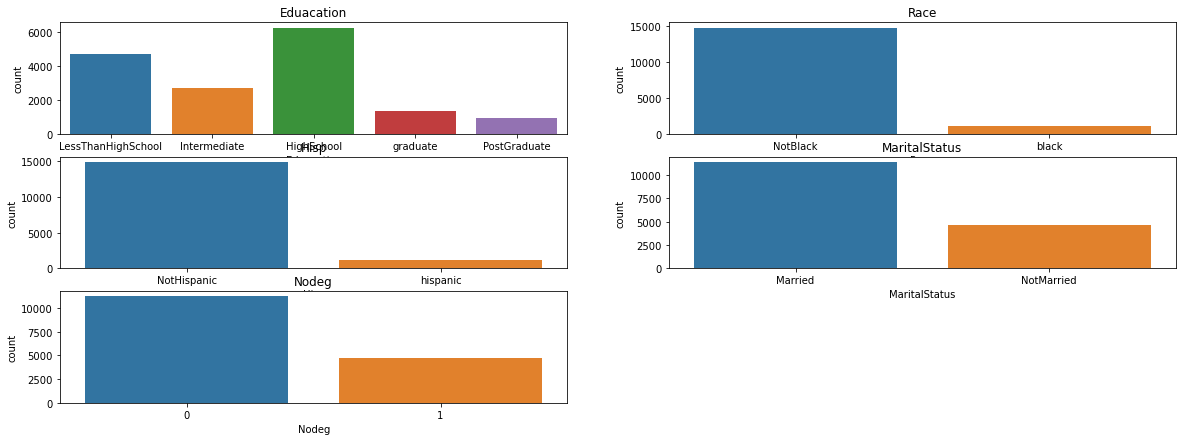

In [367]:
# Countplot for Eduacation, Race, Hisp, MaritalStatus, Nodeg

plt.figure(figsize=(20,7))

plt.subplot(3,2,1)
sns.countplot(data['Eduacation'])
plt.title('Eduacation')

plt.subplot(3,2,2)
sns.countplot(data['Race'])
plt.title('Race')

plt.subplot(3,2,3)
sns.countplot(data['Hisp'])
plt.title('Hisp')

plt.subplot(3,2,4)
sns.countplot(data['MaritalStatus'])
plt.title('MaritalStatus')

plt.subplot(3,2,5)
sns.countplot(data['Nodeg'])
plt.title('Nodeg')

plt.show()

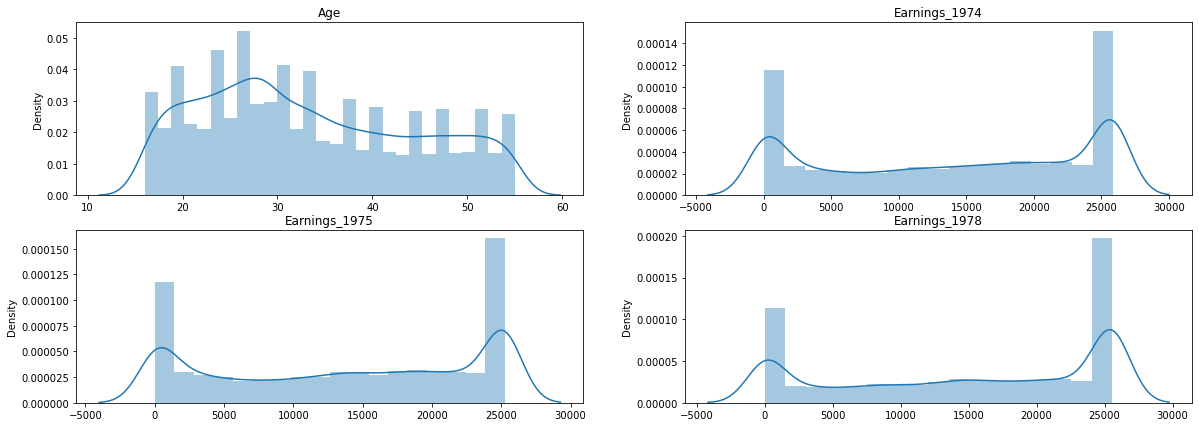

In [368]:
# Distribution plot 

plt.figure(figsize=(20,7))

plt.subplot(2,2,1)
sns.distplot(x=data['Age'])
plt.title('Age')

plt.subplot(2,2,2)
sns.distplot(x=data['Earnings_1974'])
plt.title('Earnings_1974')

plt.subplot(2,2,3)
sns.distplot(x=data['Earnings_1975'])
plt.title('Earnings_1975')

plt.subplot(2,2,4)
sns.distplot(x=data['Earnings_1978'])
plt.title('Earnings_1978')

plt.show()

According to the distribution graph the earning of all years are same or consistant.

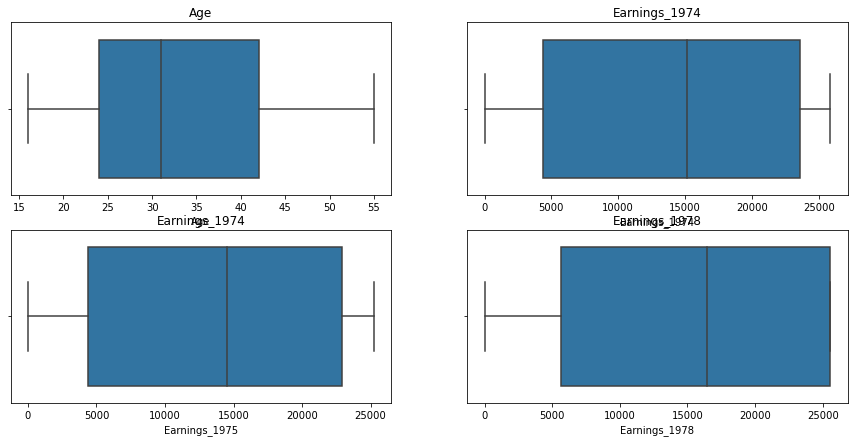

In [369]:
# Box-Plot

plt.figure(figsize=(15,7))

plt.subplot(2,2,1)
sns.boxplot(data['Age'])
plt.title('Age')

plt.subplot(2,2,2)
sns.boxplot(data['Earnings_1974'])
plt.title('Earnings_1974')

plt.subplot(2,2,3)
sns.boxplot(data['Earnings_1975'])
plt.title('Earnings_1974')

plt.subplot(2,2,4)
sns.boxplot(data['Earnings_1978'])
plt.title('Earnings_1978')

plt.show()

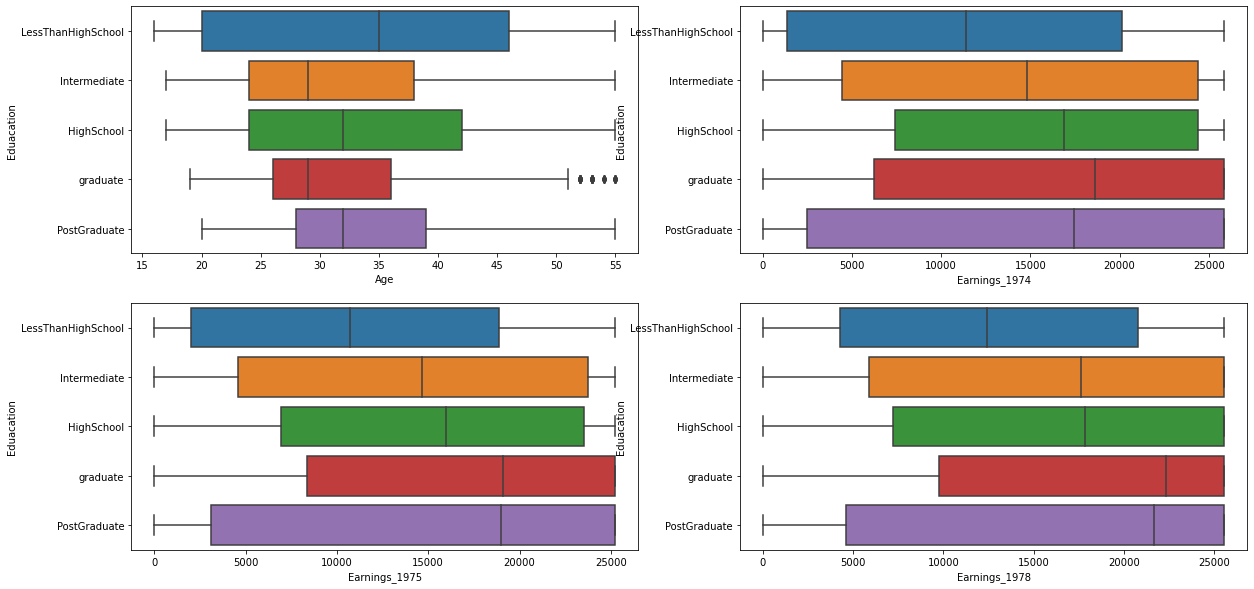

In [370]:
d = ['Age', 'Earnings_1974', 'Earnings_1975', 'Earnings_1978']
j = 1
plt.figure(figsize=(20,10))
for i in d:
    plt.subplot(2, 2, j)
    sns.boxplot(x = data[i], y = data['Eduacation'])
    j = j+1

Most of the people education is LessThanHighSchool 
And the people who are PostGraduate and Gradute have simmilar pattern of earning for all years

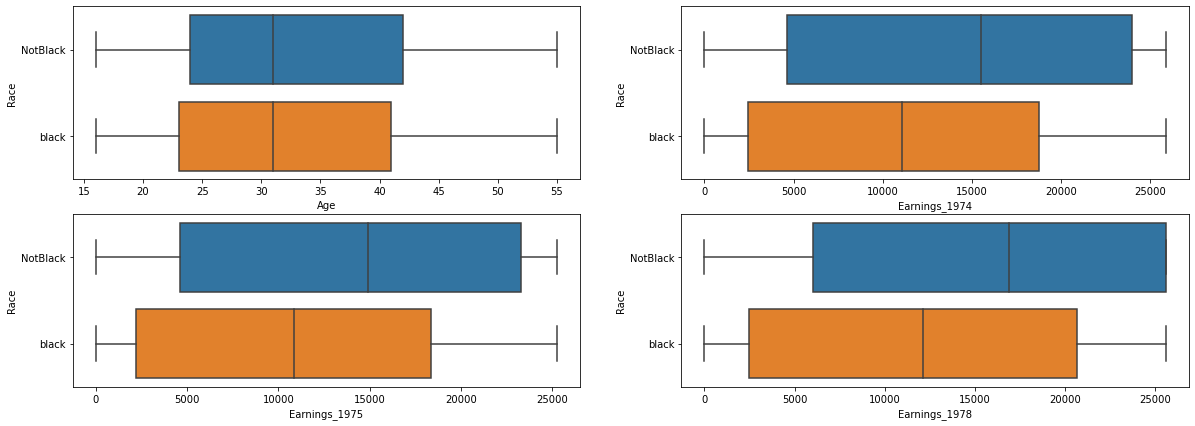

In [371]:
d = ['Age','Earnings_1974', 'Earnings_1975', 'Earnings_1978']
j = 1

plt.figure(figsize=(20,7))
for i in d:
    plt.subplot(2, 2, j)
    sns.boxplot(x = data[i], y = data['Race'])
    j = j+1
    

The NOn-black peoples have higher earning than Black peoples

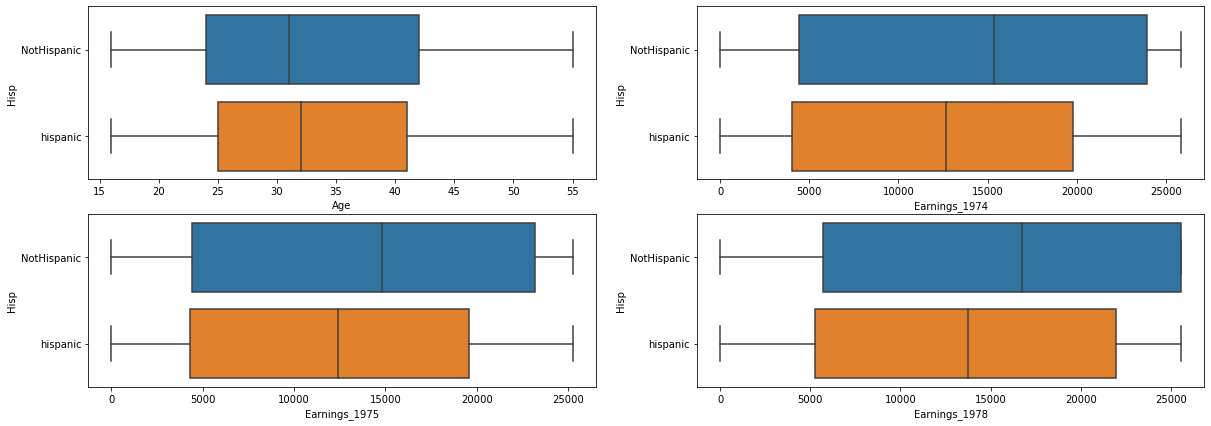

In [372]:
d = ['Age','Earnings_1974', 'Earnings_1975', 'Earnings_1978']
j = 1

plt.figure(figsize=(20,7))
for i in d:
    plt.subplot(2, 2, j)
    sns.boxplot(x = data[i], y = data['Hisp'])
    j = j+1

The Non-Hispanic have more earning than Hispanic peoples

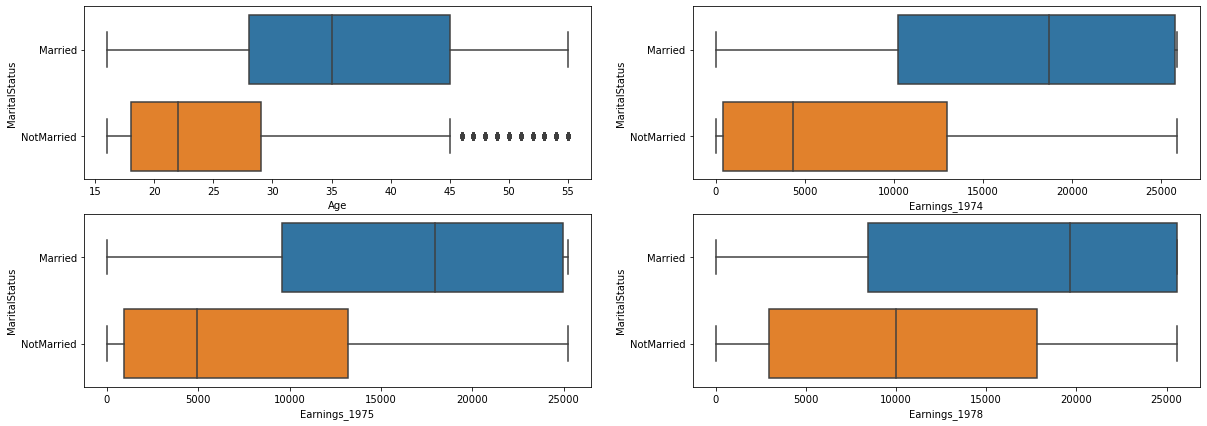

In [373]:
d = ['Age','Earnings_1974', 'Earnings_1975', 'Earnings_1978']
j = 1

plt.figure(figsize=(20,7))
for i in d:
    plt.subplot(2, 2, j)
    sns.boxplot(x = data[i], y = data['MaritalStatus'])
    j = j+1

The married peoples earn more than non-married people

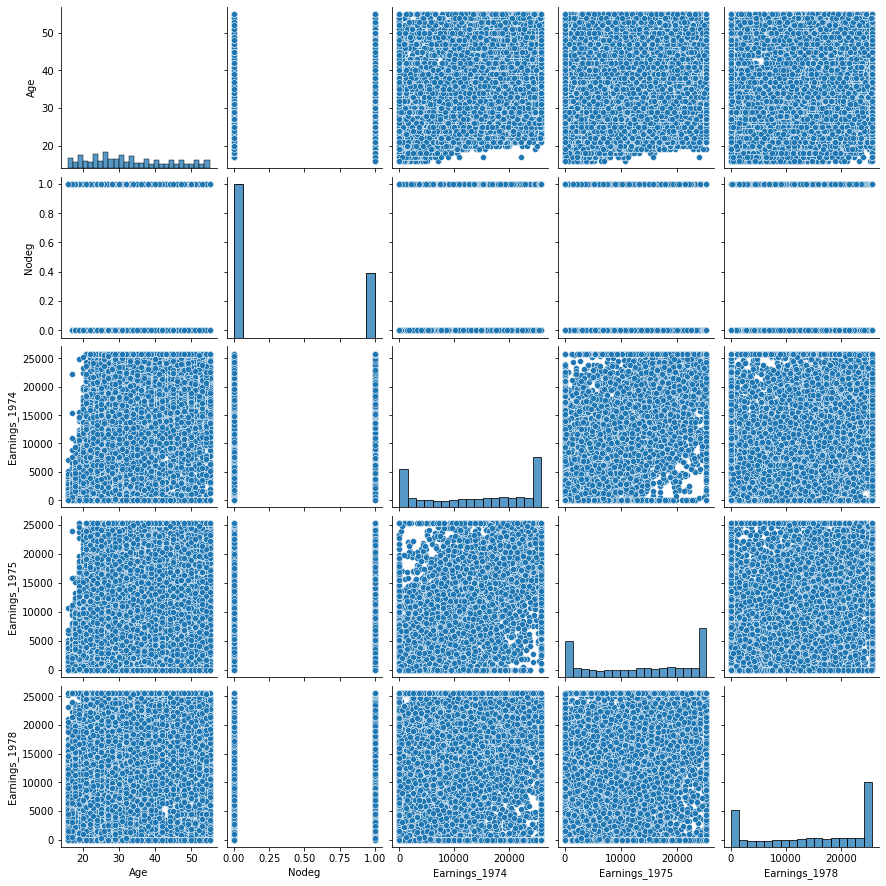

In [374]:
sns.pairplot(data)
plt.show()

## Detecting and Treating the Missing values

In [375]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Age              0.0
Eduacation       0.0
Race             0.0
Hisp             0.0
MaritalStatus    0.0
Nodeg            0.0
Earnings_1974    0.0
Earnings_1975    0.0
Earnings_1978    0.0
dtype: float64

In [376]:
data.isnull().sum()

Age              0
Eduacation       0
Race             0
Hisp             0
MaritalStatus    0
Nodeg            0
Earnings_1974    0
Earnings_1975    0
Earnings_1978    0
dtype: int64

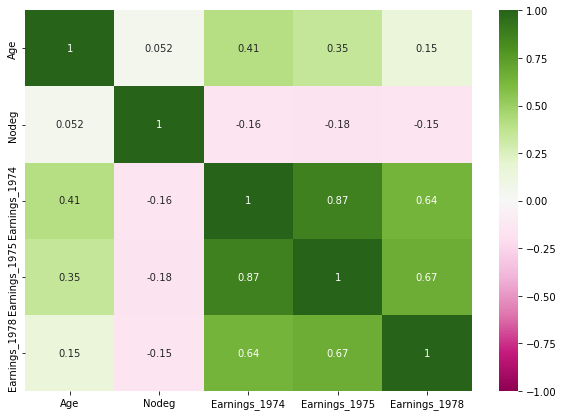

In [377]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap='PiYG')
plt.show()

## Feature Engineering

In [378]:
data=pd.get_dummies(data,drop_first=True)

In [380]:
data.head(10)

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,Eduacation_Intermediate,Eduacation_LessThanHighSchool,Eduacation_PostGraduate,Eduacation_graduate,Race_black,Hisp_hispanic,MaritalStatus_NotMarried
0,45,1,21516.670,25243.550,25564.670,0,1,0,0,0,0,0
1,21,0,3175.971,5852.565,13496.080,1,0,0,0,0,0,1
2,38,0,23039.020,25130.760,25564.670,0,0,0,0,0,0,0
3,48,1,24994.370,25243.550,25564.670,0,1,0,0,0,0,0
4,18,1,1669.295,10727.610,9860.869,0,1,0,0,0,0,0
5,22,1,16365.760,18449.270,25564.670,0,1,0,0,0,0,0
6,48,1,16804.630,16354.600,18059.300,0,1,0,0,0,0,0
7,18,1,1144.212,3620.032,15739.270,0,1,0,0,0,0,1
8,48,1,25862.320,25243.550,25564.670,0,1,0,0,0,0,0
9,45,0,25862.320,0.000,3924.842,0,0,0,0,0,0,0


## Train Test Split

In [381]:
x= data.drop(columns=['Earnings_1978'])
y= data['Earnings_1978']

In [382]:
from sklearn.model_selection import train_test_split

In [383]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,random_state=10)

In [384]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(12793, 11) (3199, 11) (12793,) (3199,)


## Multiple Linear Regression

In [385]:
from sklearn.linear_model import LinearRegression

In [386]:
model_lr=LinearRegression()

In [387]:
model_lr.fit(train_x,train_y)

LinearRegression()

In [388]:
pred_y=model_lr.predict(test_x)

In [390]:
pd.DataFrame({'Actual Y':test_y, 'Predicted Y': pred_y,'Residual':(test_y-pred_y)}).head(20)

,Actual Y,Predicted Y,Residual
9550,0.000,5393.566093,-5393.566093
4302,6147.343,14869.985867,-8722.642867
15033,0.000,18327.330766,-18327.330766
10429,25564.670,24597.784214,966.885786
4854,25564.670,22418.731090,3145.938910
12904,0.000,3807.037049,-3807.037049
6797,17843.550,18885.507530,-1041.957530
7797,25564.670,24680.301956,884.368044
11314,16037.770,13641.268572,2396.501428
8188,20317.260,23268.330885,-2951.070885


In [392]:
model_lr.coef_

array([-1.05320586e+02,  8.67510802e+00,  2.96195076e-01,  4.67207143e-01,
        3.08926646e+02,  8.67510802e+00,  7.80047558e+02,  1.01349157e+03,
       -8.92319701e+02, -3.60983919e+02, -3.76291819e+01])

In [393]:
model_lr.intercept_

7710.933825839177

## Validation

In [394]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [397]:
def validation(test,pred):
    print('R2 value: ',r2_score(test,pred))
    print('MSE: ',mean_squared_error(test,pred))
    print('RMSE: ',mean_squared_error(test,pred)*0.5)
    print('MAPE: ',mean_absolute_percentage_error(test,pred))

In [402]:
model_lr.score(test_x,test_y)

0.4761497309096364

In [403]:
# Calculate adjusted r2

In [404]:
r2= r2_score(test_y, pred_y)
n= 283
k= 16
ra2= 1-(((n-1)/(n-k-1))*(1-r2))

In [405]:
print('Adjusted R2: ', ra2)

Adjusted R2:  0.44463994028765963


## Checking the Model for Overfitting

In [407]:
print('Training Accuracy')
print(model_lr.score(train_x,train_y))

print('Test Accuracy')
print(model_lr.score(test_x,test_y))

Training Accuracy
0.4749614195895302
Test Accuracy
0.4761497309096364


The model is Underfiting model because it can't perform well in both taining and testing.

## Ridge Regression

In [408]:
from sklearn.linear_model import Ridge

In [413]:
model_ridge= Ridge(alpha=10)

In [414]:
model_ridge.fit(train_x,train_y)

Ridge(alpha=10)

In [418]:
y_pred_ridge=model_ridge.predict(test_x)

In [419]:
validation(test_y,y_pred_ridge)

R2 value:  0.47615267822228025
MSE:  48700512.33226377
RMSE:  24350256.166131884
MAPE:  5.340657496625284e+18


In [420]:
# GridSearchCV

In [422]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [426]:
# Parameter Grid
params={'alpha':[0.001,0.01,0.1,1,10,100,1000]}

In [429]:
gscv= GridSearchCV(estimator= Ridge(),
                  param_grid=params,
                  scoring='r2',
                  verbose=3,
                  cv=7)

In [430]:
gscv.fit(train_x,train_y)

Fitting 7 folds for each of 7 candidates, totalling 49 fits
[CV 1/7] END .......................alpha=0.001;, score=0.463 total time=   0.0s
[CV 2/7] END .......................alpha=0.001;, score=0.498 total time=   0.0s
[CV 3/7] END .......................alpha=0.001;, score=0.474 total time=   0.0s
[CV 4/7] END .......................alpha=0.001;, score=0.446 total time=   0.0s
[CV 5/7] END .......................alpha=0.001;, score=0.508 total time=   0.0s
[CV 6/7] END .......................alpha=0.001;, score=0.475 total time=   0.0s
[CV 7/7] END .......................alpha=0.001;, score=0.451 total time=   0.0s
[CV 1/7] END ........................alpha=0.01;, score=0.463 total time=   0.0s
[CV 2/7] END ........................alpha=0.01;, score=0.498 total time=   0.0s
[CV 3/7] END ........................alpha=0.01;, score=0.474 total time=   0.0s
[CV 4/7] END ........................alpha=0.01;, score=0.446 total time=   0.0s
[CV 5/7] END ........................alpha=0.01;,

GridSearchCV(cv=7, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='r2', verbose=3)

In [432]:
gscv.best_params_

{'alpha': 100}

In [433]:
model_ridge= Ridge(**gscv.best_params_)

In [434]:
model_ridge.fit(x,y)

Ridge(alpha=100)

In [435]:
y_pred_ridge= model_ridge.predict(test_x)

In [436]:
validation(test_y,y_pred_ridge)

R2 value:  0.4766160531585911
MSE:  48657433.75600287
RMSE:  24328716.878001437
MAPE:  5.354433200229573e+18


In [437]:
# RandomizedSearchCV

In [438]:
from scipy.stats import randint, uniform, loguniform

In [439]:
params={'alpha':loguniform(0.1,10)}

In [442]:
rscv= RandomizedSearchCV(estimator=Ridge(),
                        param_distributions=params,
                        scoring='r2',
                        verbose=3,
                        cv=7)

In [443]:
rscv.fit(x,y)

Fitting 7 folds for each of 10 candidates, totalling 70 fits
[CV 1/7] END ..........alpha=1.9089760432699503;, score=0.450 total time=   0.0s
[CV 2/7] END ..........alpha=1.9089760432699503;, score=0.486 total time=   0.0s
[CV 3/7] END ..........alpha=1.9089760432699503;, score=0.473 total time=   0.0s
[CV 4/7] END ..........alpha=1.9089760432699503;, score=0.451 total time=   0.0s
[CV 5/7] END ..........alpha=1.9089760432699503;, score=0.508 total time=   0.0s
[CV 6/7] END ..........alpha=1.9089760432699503;, score=0.459 total time=   0.0s
[CV 7/7] END ..........alpha=1.9089760432699503;, score=0.491 total time=   0.0s
[CV 1/7] END .........alpha=0.20547988624025249;, score=0.450 total time=   0.0s
[CV 2/7] END .........alpha=0.20547988624025249;, score=0.486 total time=   0.0s
[CV 3/7] END .........alpha=0.20547988624025249;, score=0.473 total time=   0.0s
[CV 4/7] END .........alpha=0.20547988624025249;, score=0.451 total time=   0.0s
[CV 5/7] END .........alpha=0.20547988624025249;

RandomizedSearchCV(cv=7, estimator=Ridge(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C1B4312E80>},
                   scoring='r2', verbose=3)

In [444]:
rscv.best_params_

{'alpha': 4.7116300026191835}

In [446]:
rscv.score(test_x,test_y)

0.4766280533915528